## EDA and Forecasting Brent Oil Prices

In [288]:
import pandas as pd
# Set the option to display all columns
pd.set_option('display.max_columns', None)
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline 
import plotly.express as px           # For interactive plots
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [289]:
# load the data
df = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/BrentOilPrices.csv")
df.head()

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [290]:
df.shape

(8216, 2)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8216 non-null   object 
 1   Price   8216 non-null   float64
dtypes: float64(1), object(1)
memory usage: 128.5+ KB


In [292]:
# datetime
df['Date'] = pd.to_datetime(df['Date'], format="%b %d, %Y")
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [293]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

Date     0
Price    0
dtype: int64

In [294]:
# To check any duplicate rows
df.duplicated().sum()

0

In [295]:
df.tail()

,Date,Price
8211,2019-09-24,64.13
8212,2019-09-25,62.41
8213,2019-09-26,62.08
8214,2019-09-27,62.48
8215,2019-09-30,60.99


### Basic Statistical Details and Visualization

In [297]:
#numerical Columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,8216,2003-07-19 20:24:25.238558848,1987-05-20 00:00:00,1995-06-11 06:00:00,2003-07-21 12:00:00,2011-08-22 06:00:00,2019-09-30 00:00:00,NaN
Price,8216.0,46.332605,9.1,18.73,31.26,67.4325,143.95,32.704113


<Axes: ylabel='Price'>

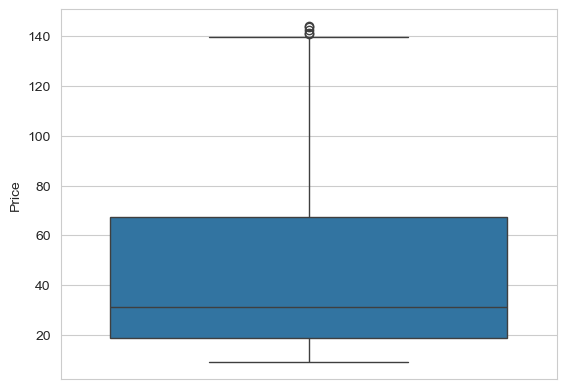

In [298]:
# use boxplot to check outliers in Price
sns.boxplot(df.Price)

In [299]:
# check for outliers
print('skew:',df['Price'].skew())
print('kurtosis:',df['Price'].kurtosis())

skew: 0.8842746903269084
kurtosis: -0.42699730674430914


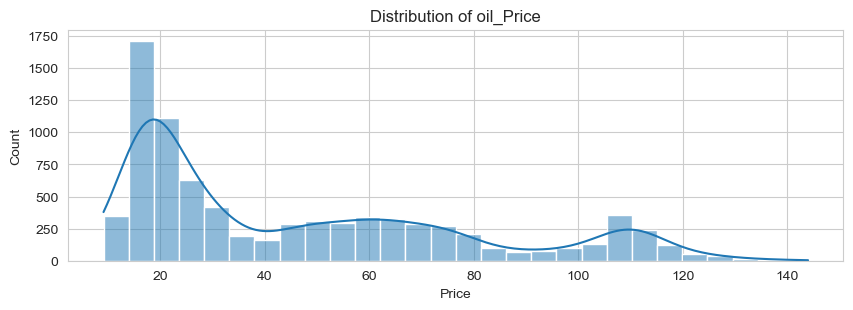

In [300]:
# distribution of price
plt.figure(figsize=(10,3))
sns.histplot(df.Price,kde=True)
plt.title('Distribution of oil_Price') 
plt.savefig('1')
plt.show()

#### Key Findings from the Distribution of Oil Prices

- **Peak Frequency**: The highest frequency of oil prices is observed around the $20 mark, indicating a significant portion of the data is concentrated at this price level.

- **Right Skew**: The distribution is right-skewed, with a long tail extending towards higher prices, suggesting occasional high price spikes.

- **Multiple Modes**: There are noticeable peaks, or modes, around $20, $60, and $120, indicating these prices are more common than others.

- **Price Variability**: The wide range of prices, from below $20 to above $140, highlights considerable variability in oil prices.

- **Density Distribution**: The density curve follows the histogram closely, reinforcing the observed trends and patterns.



### Brent Oil Prices Over Time

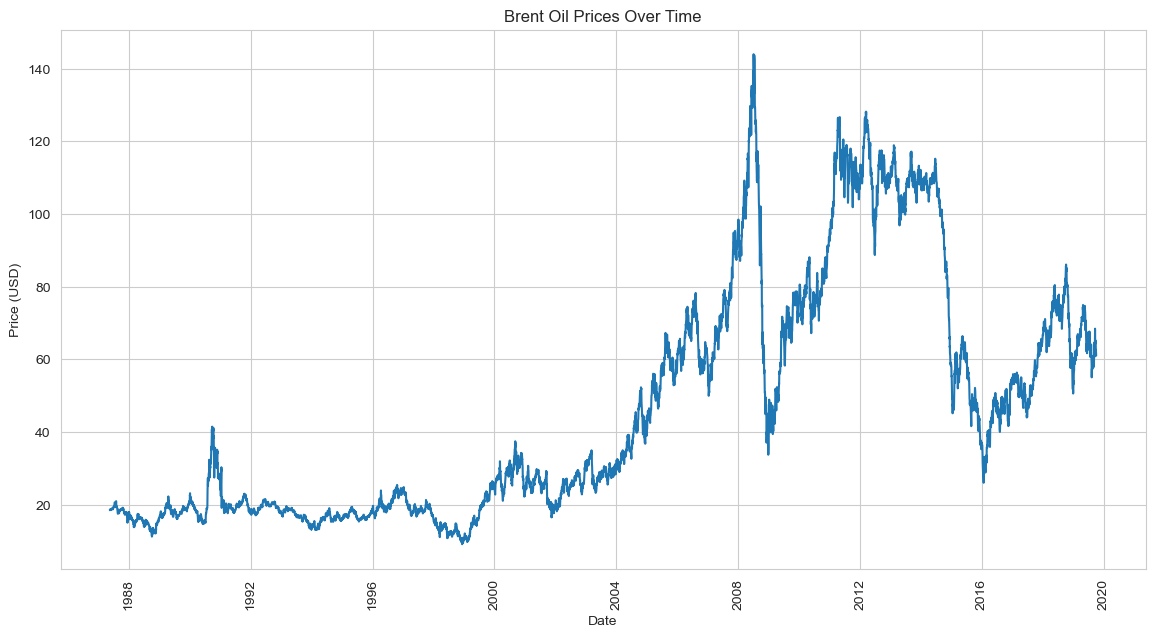

In [303]:
# Brent Oil Prices Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=90) 
plt.savefig('1')
plt.show()

#### Key Observations from Brent Oil Prices Over Time

- **Long-term Trend**: Brent oil prices show an overall upward trend from 1988 to 2008, followed by significant fluctuations.

- **Major Peaks**: Notable peaks occur around 2008 and 2012, with prices reaching over $140 USD.

- **Volatility**: The period between 2008 and 2016 is marked by high volatility, with sharp rises and falls.

- **Recent Stability**: Post-2016, prices seem to stabilize somewhat, though fluctuations remain.

- **Historical Lows**: Prices were relatively stable and low before the year 2000, primarily under $40 USD.



# Model Development and Evaluation

## 1. Forecast Model Using Prophet

In [307]:
from prophet import Prophet
model = Prophet()

In [308]:
pro_df = df.copy()
pro_df.columns = ['ds','y']
pro_df.head()

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [309]:
# Fit the model
model.fit(pro_df)

13:39:37 - cmdstanpy - INFO - Chain [1] start processing
13:39:39 - cmdstanpy - INFO - Chain [1] done processing


In [310]:
# Create a future DataFrame for 30 days ahead
future = model.make_future_dataframe(periods=30)  # Change 30 to any number of days you want to predict

In [311]:
# Generate forecast
forecast = model.predict(future)

In [312]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-05-20,16.436499,1.359724,33.325373,16.436499,16.436499,0.994033,0.994033,0.994033,-0.453068,-0.453068,-0.453068,1.447101,1.447101,1.447101,0.0,0.0,0.0,17.430531
1,1987-05-21,16.440049,1.930950,33.608045,16.440049,16.440049,1.162842,1.162842,1.162842,-0.293627,-0.293627,-0.293627,1.456469,1.456469,1.456469,0.0,0.0,0.0,17.602891
2,1987-05-22,16.443599,1.969822,33.066034,16.443599,16.443599,1.077276,1.077276,1.077276,-0.386583,-0.386583,-0.386583,1.463858,1.463858,1.463858,0.0,0.0,0.0,17.520875
3,1987-05-25,16.454249,1.950355,32.852805,16.454249,16.454249,1.115841,1.115841,1.115841,-0.356163,-0.356163,-0.356163,1.472004,1.472004,1.472004,0.0,0.0,0.0,17.570090
4,1987-05-26,16.457799,2.709882,33.565789,16.457799,16.457799,1.000086,1.000086,1.000086,-0.469405,-0.469405,-0.469405,1.469491,1.469491,1.469491,0.0,0.0,0.0,17.457885


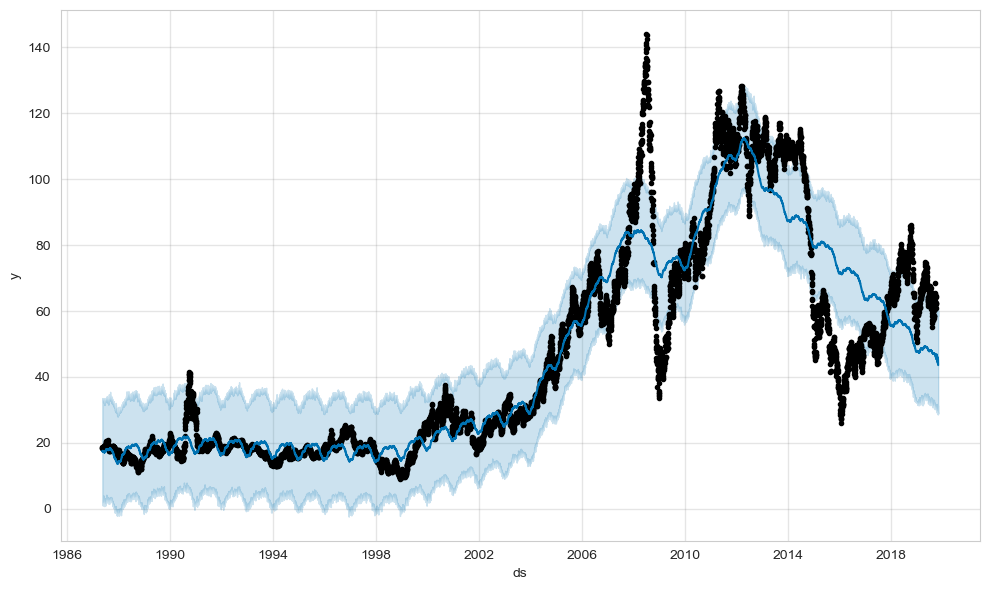

In [313]:
# Plot the forecast
fig = model.plot(forecast)


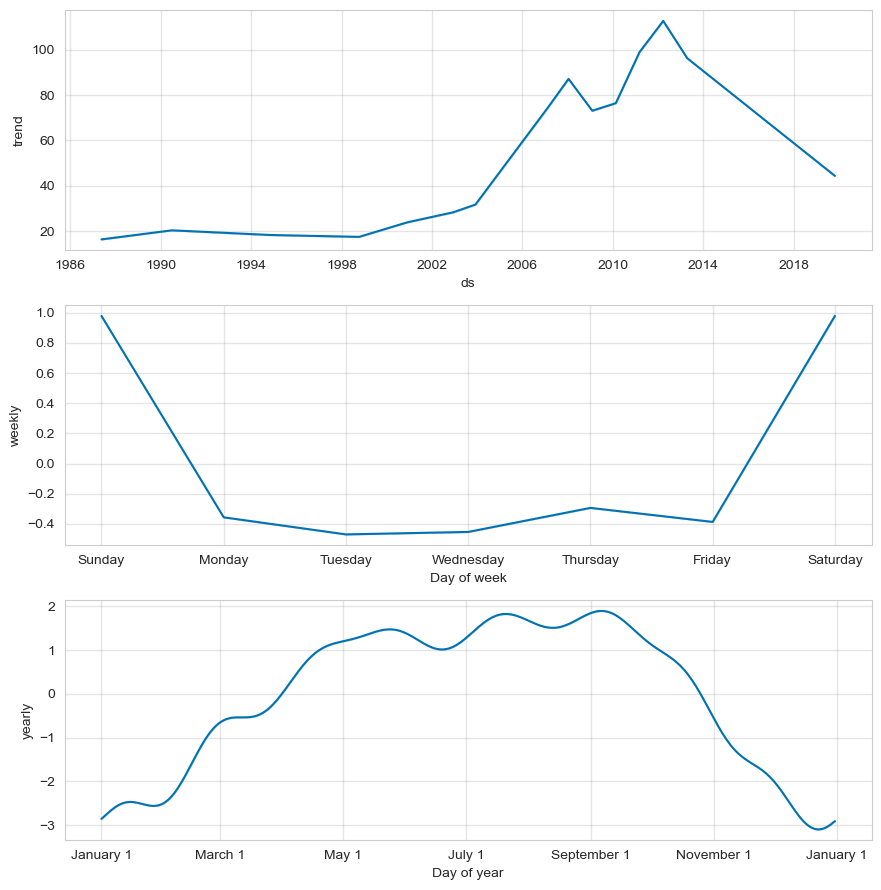

In [314]:
#visualize the components
fig2 = model.plot_components(forecast)

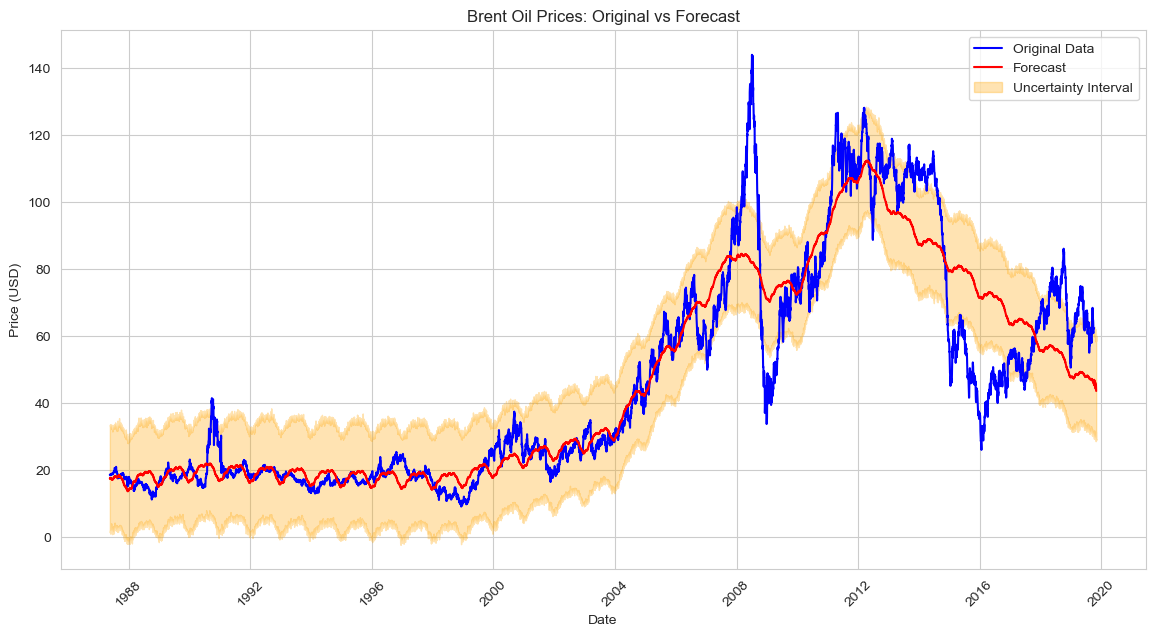

In [315]:
#Plot the original data and the forecast together
plt.figure(figsize=(14, 7))

# Plot the original data
plt.plot(pro_df['ds'], pro_df['y'], label='Original Data', color='blue', linestyle='-')

# Plot the forecast data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red', linestyle='-')

# Plot the uncertainty intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3, label='Uncertainty Interval')

# Customize the plot
plt.title('Brent Oil Prices: Original vs Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()

#### Key Insights from Brent Oil Prices: Original vs Forecast

- **Forecast Accuracy**: The forecast (red line) aligns well with the original data (blue line) for many periods, indicating a reliable model.
- **Uncertainty Intervals**: The shaded area represents uncertainty, which widens significantly during volatile periods, such as around 2008 and 2014.
- **Trend Prediction**: The model captures the overall upward trend until 2008 and the subsequent decline and fluctuations.
- **Limitations in Volatility**: Despite general accuracy, the model struggles to predict sharp spikes and drops accurately, as seen in 2008 and 2016.
- **Future Implications**: Understanding these patterns and uncertainties can aid in better forecasting and risk management strate trends.

## 2. Using ARIMA (AutoRegressive Integrated Moving Average)

In [318]:
#Step 1 - First we import the required libraries
from statsmodels.tsa.arima.model import ARIMA    # ARIMA Modeling
from statsmodels.tsa.stattools import adfuller   # Augmented Dickey-Fuller Test for Checking Stationary
from statsmodels.tsa.stattools import acf, pacf  # Finding ARIMA parameters using Autocorrelation
from statsmodels.tsa.seasonal import seasonal_decompose # Decompose the ARIMA Forecast model

In [319]:
#Step 2 - Arima requires the date column to be set as index
arima_df = df.copy()
arima_df.set_index('Date', inplace=True)
arima_df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [320]:
#Step 3: Check for Stationarity

result = adfuller(arima_df['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -1.9547492530356467
p-value: 0.3067593777114648
The series is not stationary.


**if the p-value is greater than 0.05, the series is not stationary, and you may need to differenciate the data.**

In [322]:
#Step 4: Differencing to stabilize the mean.

arima_df['Price_diff'] = arima_df['Price'].diff()

# Drop missing values created by differencing
arima_df['Price_diff'].dropna(inplace=True)

# Check the ADF test on the differenced series
result_diff = adfuller(arima_df['Price_diff'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

ADF Statistic (Differenced): -13.327579170943809
p-value (Differenced): 6.276497475415973e-25


In [323]:
#Step-5:  Fit the ARIMA model

#Set the frequency of the datetime index
arima_df = arima_df.asfreq('Y')  # Use 'D' for daily frequency, 'M' for monthly, etc.

model = ARIMA(arima_df['Price'], order=(1, 1, 1))  # You can tune these parameters later
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   32
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -88.245
Date:                Wed, 18 Sep 2024   AIC                            182.490
Time:                        13:39:47   BIC                            186.792
Sample:                    12-31-1987   HQIC                           183.892
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3751      0.388      0.966      0.334      -0.386       1.136
ma.L1         -0.7006      0.273     -2.570      0.010      -1.235      -0.166
sigma2       542.1172    186.892      2.901      0.0

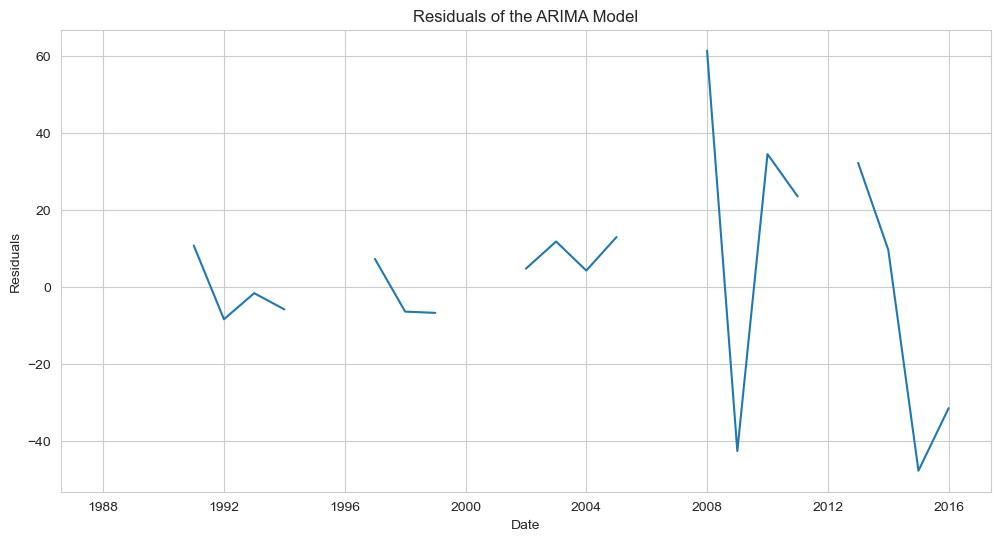

In [324]:
#Step-6 :  Evaluate the Model

# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()


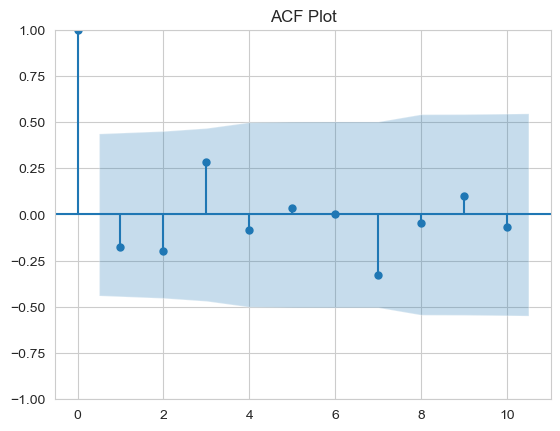

In [325]:
#Step-7 : Plot ACF and PACF
#Use the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots to identify the parameters for the ARIMA model.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(arima_df['Price_diff'].dropna())
plt.title('ACF Plot')
plt.show()


#### Key Observations from the ACF Plot of Price Differences

- **Lag 0 Autocorrelation**: The autocorrelation at lag 0 is 1, as expected, since it represents the correlation of the series with itself.
- **Rapid Decay**: The autocorrelation quickly drops close to zero after the first lag, indicating a lack of significant autocorrelation in price differences.
- **Stationarity**: The absence of significant lags suggests that the differenced series is likely stationary, making it suitable for further time series analysis.
- **Noise Characteristics**: The plot suggests the series behaves like white noise, with no discernible pattern or predictability from past valasting.

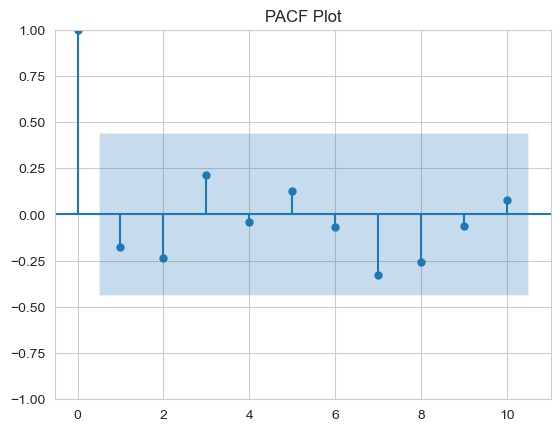

In [327]:
plot_pacf(arima_df['Price_diff'].dropna())
plt.title('PACF Plot')
plt.show()

#### Key Observations from the PACF Plot of Price Differences

- **Lag 0 Autocorrelation**: The partial autocorrelation at lag 0 is 1, which is expected.
- **Minimal Significant Lags**: The PACF shows minimal significant lags beyond lag 0, suggesting that there is little to no partial autocorrelation in the series.
- **Independence of Lags**: The lack of significant partial autocorrelations indicates that individual lags do not provide additional predictive value once earlier lags are accounted for.
- **Model Implications**: The series likely does not require additional AR terms, as there are no significant spikes in the Ponents.

2019-12-31    60.097122
2020-12-31    60.393517
2021-12-31    60.504692
2022-12-31    60.546393
2023-12-31    60.562034
2024-12-31    60.567901
2025-12-31    60.570102
2026-12-31    60.570927
2027-12-31    60.571237
2028-12-31    60.571353
Freq: YE-DEC, Name: predicted_mean, dtype: float64


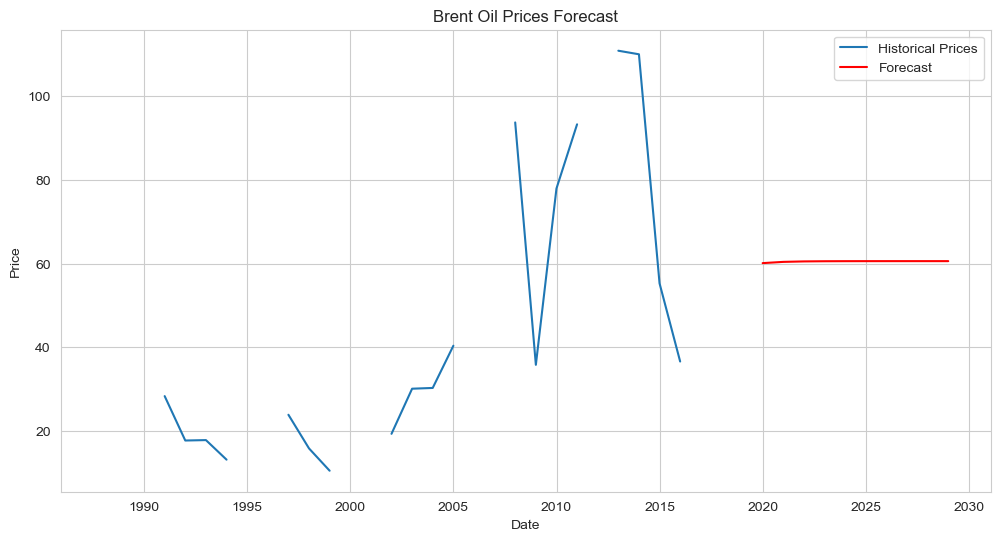

In [329]:
#Step-9: Make Predictions 

# Forecast the next 10 periods
forecast = model_fit.forecast(steps=10)
print(forecast)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(arima_df['Price'], label='Historical Prices')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Brent Oil Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


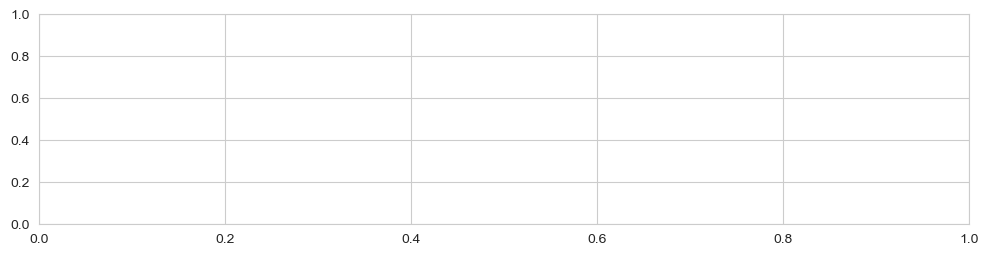

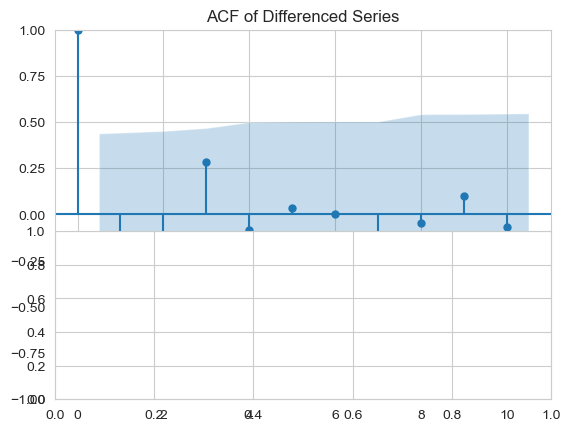

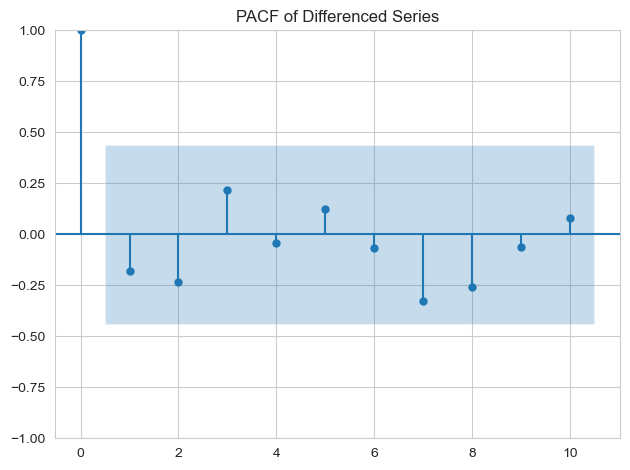

In [330]:
#step-10 : Tune the Model 
# Tuning an ARIMA model involves selecting the optimal values for the parameters ,p (autoregressive order), d (degree of differencing), and q (moving average order).

#Plot ACF and PACF

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(arima_df['Price_diff'].dropna())
plt.title('ACF of Differenced Series')

plt.subplot(212)
plot_pacf(arima_df['Price_diff'].dropna())
plt.title('PACF of Differenced Series')

plt.tight_layout()
plt.show()


In [383]:
# Test Multiple Combinations of p and q

# Define the p and q values to try
p_values = range(0, 3)  # You can extend this range
q_values = range(0, 3)
d = 1  # We've already differenced once

best_aic = float('inf')
best_order = None
best_model = None

# Loop over p and q values
for p in p_values:
    for q in q_values:
        try:
            model = ARIMA(arima_df['Price'], order=(p, d, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, d, q)
                best_model = model_fit
        except:
            continue

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')


Best ARIMA order: (0, 1, 0) with AIC: 180.697661244437


In [385]:
# Review the best_model
# Print the summary of the best model
print(best_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   32
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -89.349
Date:                Wed, 18 Sep 2024   AIC                            180.698
Time:                        13:44:58   BIC                            182.132
Sample:                    12-31-1987   HQIC                           181.165
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       544.2244    136.621      3.983      0.000     276.452     811.997
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):                27.54
Prob(Q):                              0.15   Pr

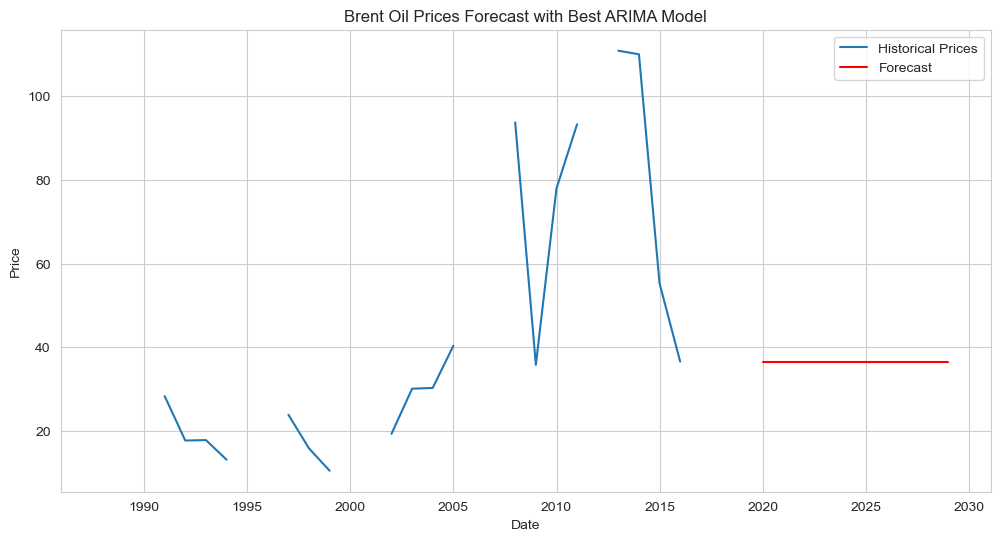

In [389]:
# Forecast with best_model
# Forecast the next 10 periods

forecast = best_model.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(arima_df['Price'], label='Historical Prices')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Brent Oil Prices Forecast with Best ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


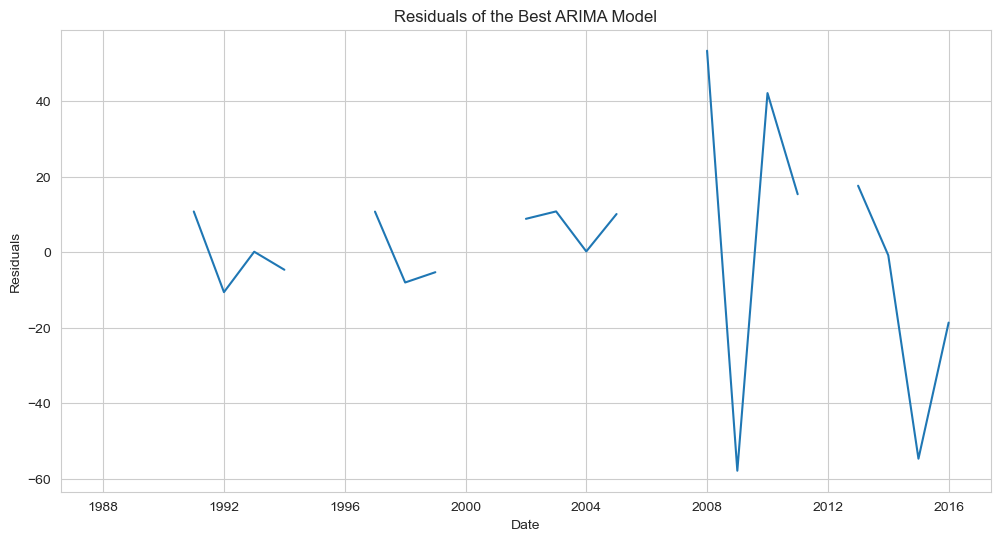

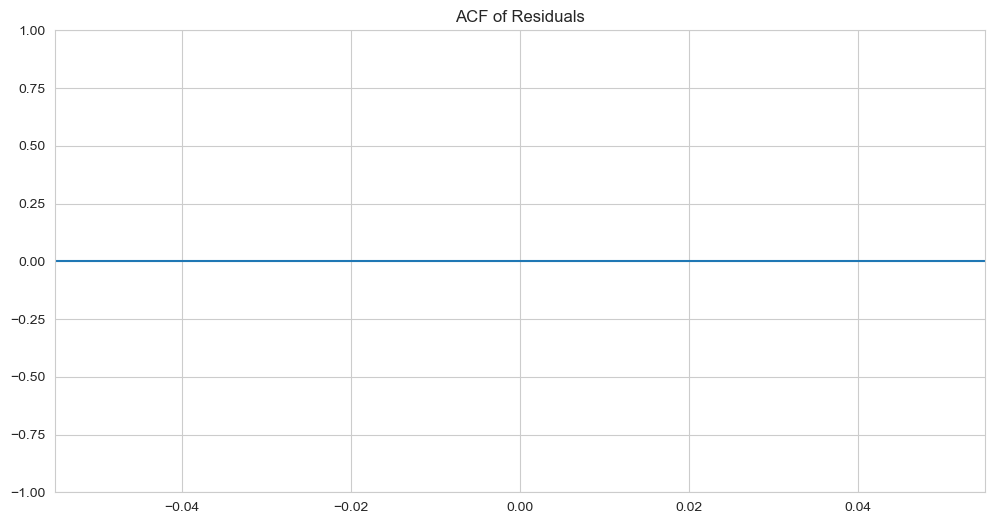

In [393]:
# Plot residuals
residuals = best_model.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of the Best ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()
